[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ)
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [2]:
#Импортирование библиотек, загрузка файла
import pandas as pd              #Импорт библиотеки Pandas
import numpy as np               #Импорт библиотеки Numpy
import seaborn as sns            #Импорт библиотеки Seaborn
import matplotlib.pyplot as plt  #Импорт библиотеки Matplotlib


data = pd.read_csv('telecom_users.csv', index_col='Unnamed: 0')  #Открытие файла с данными
data.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
# Проверка пропущенных значений
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [4]:
# Количество уникальных пользователей
data.customerID.nunique()

5986

Пропущенных значений нет, все пользователи уникальны, но в переменной TotalCharges имеется несоответсвующий тип данных. Также датасет содержит много текстовых данных. 

In [5]:
# Посмотрим какие это значения
not_float = []
for i in data['TotalCharges']:
    try:
        float(i)
        not_float.append(False)
    except:
        not_float.append(True)

data[not_float] 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


Можно заменить неконвертируемые значения в столбце TotalCharges на 0

In [6]:
new_type_list = []
for i in data['TotalCharges']:
    try:
        i = float(i)
    except:
        i = 0
    new_type_list.append(i)

data['TotalCharges'] = new_type_list

In [7]:
#Информация о числовых типах данных
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,32.468760,64.802213,2294.221559
std,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.650000,401.587500
50%,0.000000,29.000000,70.400000,1408.575000
75%,0.000000,56.000000,89.900000,3841.500000
max,1.000000,72.000000,118.750000,8684.800000


array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

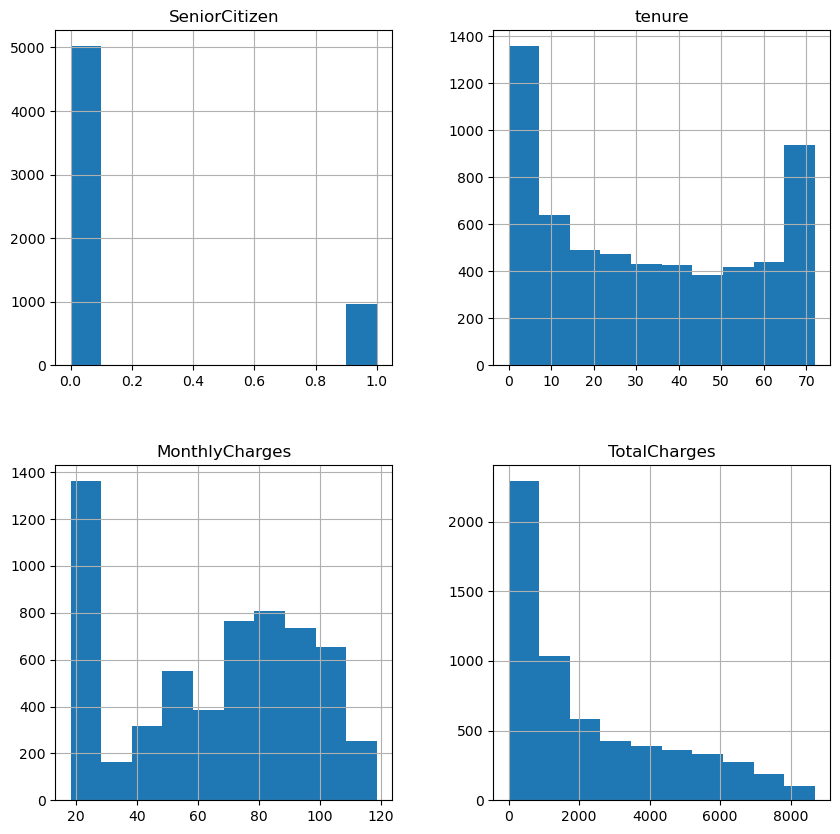

In [8]:
# гистограммы для числовых типов данных
data.hist(figsize=(10,10))

In [9]:
# Информация о категориальных переменных
data.describe(include = object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


Данные чистые, для числовых значений выбросов не наблюдается, категориальные переменные содержат только релевантные уникальные названия.

## Выводы по анализу данных:

* Пропущенных данных не обнаружено, за исключением нескольких строк в переменной TotalCharges. Все записи идентичны, указаны без ошибок.
* Медианный месячный платеж среди всех абонентов составляет 70.4 у.е.
* Большинство абонентов - мужчины.
* Больше 75% абонентов не являются пенсионерами.
* Медианное количество месяцев подписки составляет 29 месяцев. Максимальное - 72.
* Большинство клиентов не состоят в браке а так же не имеют иждивенцев.
* Интернет провайдером большинства клиентов является Fiber optic.
* Большинство клиентов не пользуются дополнительными услугами.
* Большая часть клиентов имеют тип контракта Month-to-month.
* Electronic check является приоритетным способом оплаты.

# 2. Исследование зависимостей и формулирование гипотез

In [10]:
data_digit = data.copy()

In [11]:
# Удаляем признак ID клиента
del data_digit['customerID']

In [12]:
# Заменяем категореальные признаки на числовые, сооветсвующие их номеру в списке уникальных элементов
feature_dict = {} # Словарь, в котором хранится название категориального признака и словарь с сопоставляемым варианту ответа номером
for i_col in data_digit.columns:
    if data_digit[i_col].dtype.type == np.object_:
        sym_dict = {} # Словарь с уникальными вариантами ответа в колонке и соответствующими номерами для этих ответов
        for i, sym in enumerate(sorted(data_digit[i_col].unique())):
            sym_dict[sym] =i
        feature_dict[i_col] = sym_dict
        data_digit[i_col] = data_digit[i_col].map(sym_dict) # Замена категориальных признаков на числовые значения
            
            
        

In [13]:
# Визуализируем данные
data_digit.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
4528,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
6344,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
6739,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
432,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0


In [14]:
# Проверим словарь с категориальными признаками
feature_dict

{'gender': {'Female': 0, 'Male': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'Dependents': {'No': 0, 'Yes': 1},
 'PhoneService': {'No': 0, 'Yes': 1},
 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'OnlineBackup': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'TechSupport': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingTV': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'StreamingMovies': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
  'Credit card (automatic)': 1,
  'Electronic check': 2,
  'Mailed check': 3},
 'Churn': {'No': 0, 'Yes': 1}}

In [15]:
churn_perc = data_digit.Churn.sum()/data_digit.Churn.count()*100
print(f'Процент оттока абонентов: {round(churn_perc, 2)} %')

Процент оттока абонентов: 26.51 %


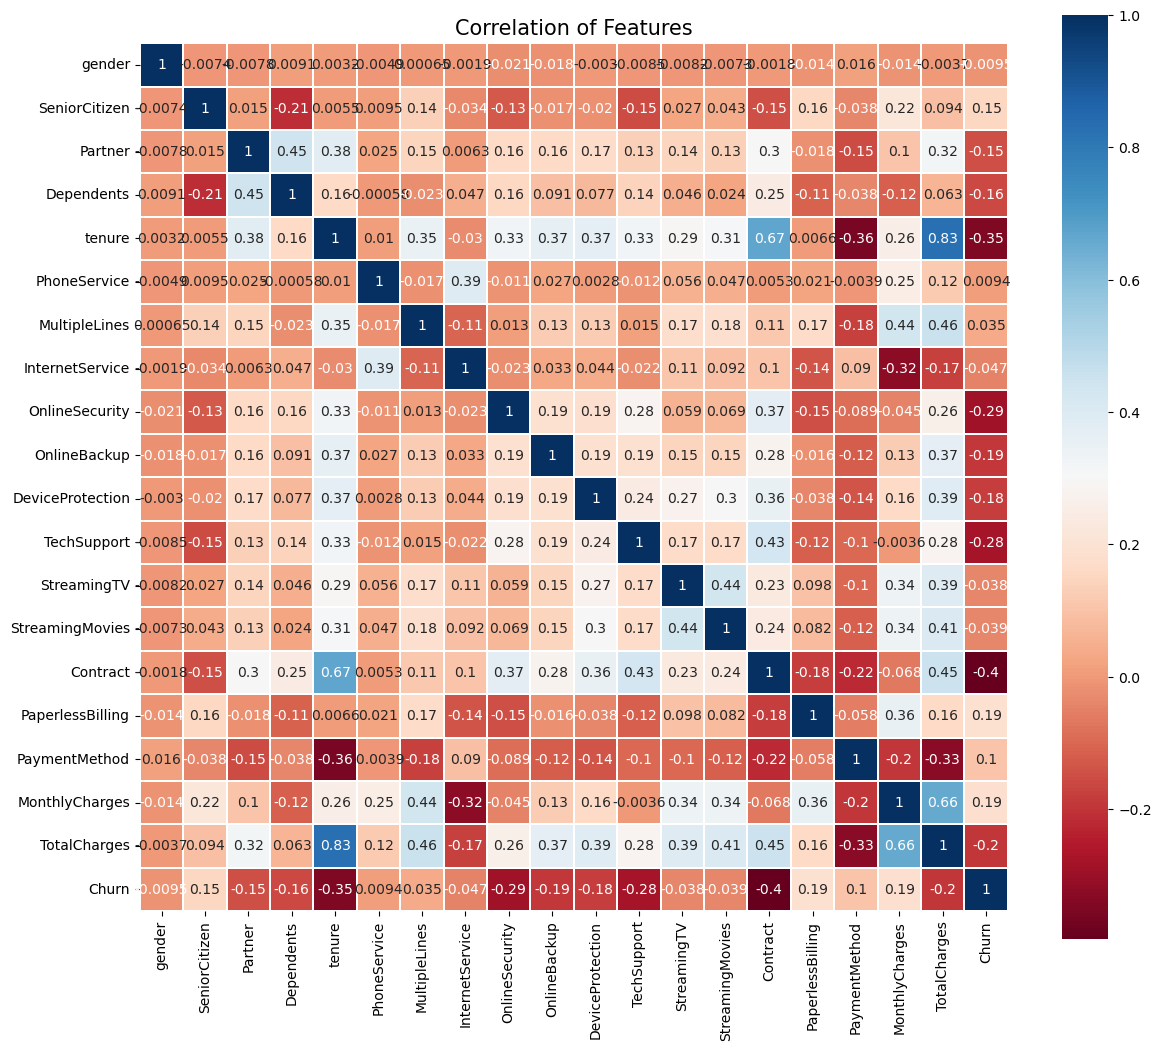

In [16]:
#Посмотрим на корреляционные связи между признаками
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of Features', y=1, size=15)
sns.heatmap(data_digit.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True, fmt='.2g')
plt.show()

С целевой переменной Churn имеется слабая корреляционная связь у признаков: Tenure, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, Contract, PaperlessBilling, MonthlyCharges, TotalCharges.

Наличие корреляционной связи этих признаков с целевой переменной говорит нам о том что существует вероятность того, что клиент вероятно откажется от услуг связи, если у него не активированы услуги по онлайн безопасности, защите устройства, резервному копированию данных и технической поддержки. Так же существует зависимость оттока и использования безбумажного биллинга. Зависимости между оттоком, количеством месяцев подписки, меcячной платой и типом контракта являются следственными связями.

In [17]:
# Посмтотрим сколько процентов клиентов пользовались услугами этими услугами
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling']

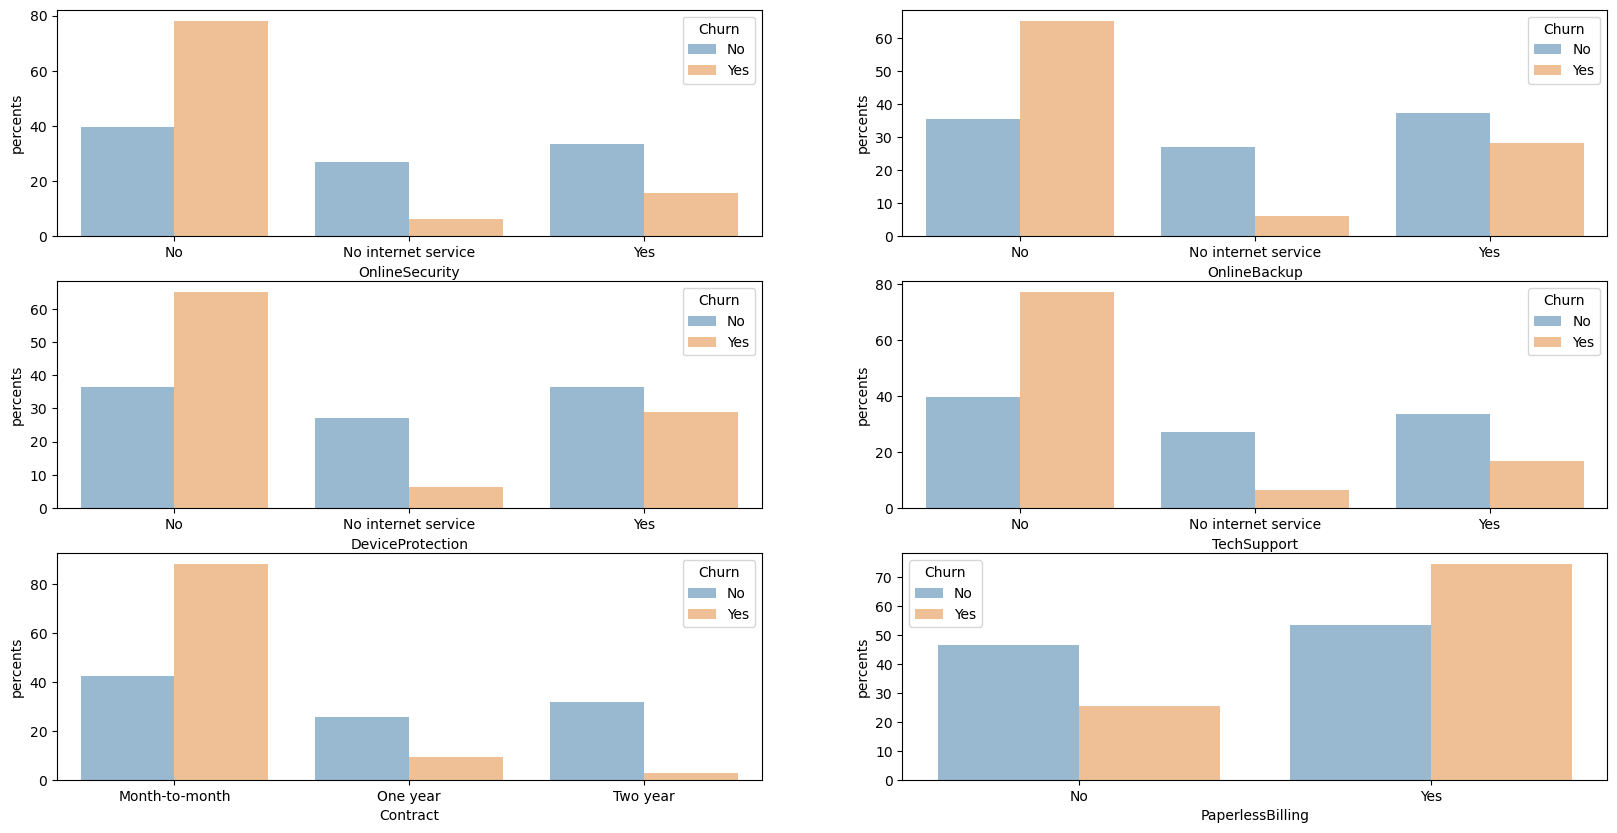

In [18]:
fig = plt.figure(figsize=(20,10))
for i_n, i_col in enumerate(columns):
    new_data = data[[i_col, 'Churn', 'TotalCharges']].groupby(['Churn', i_col]).count().reset_index()
    new_data.columns =  ['Churn', i_col, 'percents']

    for i, i_raw in new_data.iterrows():
        if i_raw['Churn'] == 'No':
            new_data.loc[i, 'percents'] = new_data.loc[i, 'percents']/(data_digit.Churn.count()-data_digit.Churn.sum())*100
        else:
            new_data.loc[i, 'percents'] = new_data.loc[i, 'percents']/(data_digit.Churn.sum())*100
    ax = fig.add_subplot(3,2,i_n+1)
    sns.barplot(data= new_data, x = i_col, y = 'percents', hue = 'Churn', ax =ax, alpha = 0.5)

* Около 80% клиентов, которые ушли в отток не пользовались услугами онлайн безопасности, технической поддержки, а также имели ежемесячный тип контракта. 
* Уже около 60% клиентов, ушедших в отток, не пользовались услугами резервного копирования и защиты устройства.
* Также около 70% клиентов, ушедших в отток пользовались безбумажным биллингом.
* Для активных клиентов распределение по вариантам практически равномерное.

Text(0.5, 1.0, 'Абоненты ушедшие в отток')

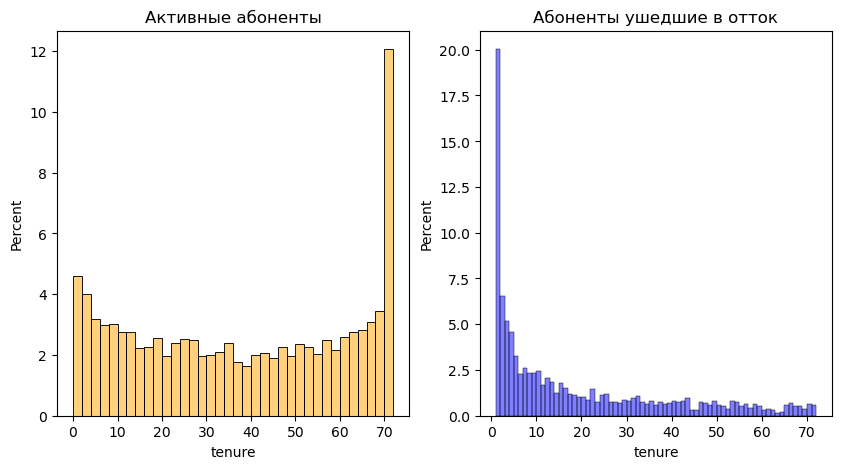

In [19]:
# Посмотрим статистику месяцев пользования клиентов услугами для 2 групп
fig, axs = plt.subplots(figsize = (10, 5), ncols = 2)
sns.histplot(data = data[data.Churn == 'No'], x = 'tenure',  stat = 'percent', alpha= 0.5, ax = axs[0], color='orange',binwidth=2)
axs[0].set_title('Активные абоненты')
sns.histplot(data = data[data.Churn == 'Yes'], x = 'tenure', stat = 'percent', alpha= 0.5, ax = axs[1], color= 'blue', binwidth = 1)
axs[1].set_title('Абоненты ушедшие в отток')

* Видно, что около 20% клиентов, ушедших в отток, пользовались услугами около месяца.
* Около 12% активных клиентов пользуются услугами более 70 месяцев

C:\Users\MIKHAIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


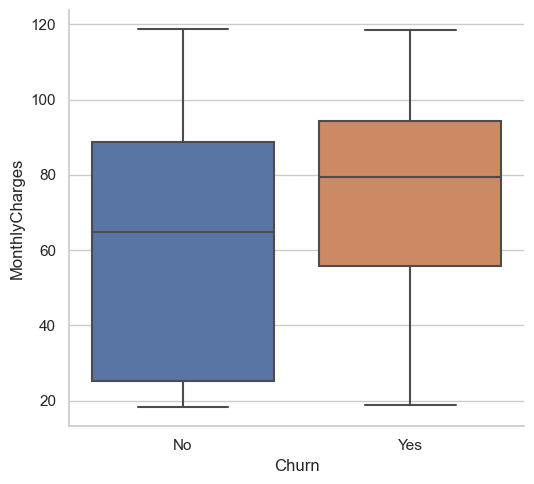

In [20]:
# Посмотрим как распределены дынные о месячной плате за связь среди 2 групп клиентов
sns.set(style="whitegrid") 
ax = sns.catplot('Churn', 'MonthlyCharges', data=data, aspect=1.1, height=5, kind='box') 


Медианное значение группы оттока оказалось выше чем значение у группы активных клиентов, несмотря на то что большинство ушедших клиентов не пользовалось улсугами безопасности. Возможно, большинство этих клиентов посчитало, что переплачивает за услуги.

## Вывод по данным проведённого анализа

* Для клиентов ушедших в отток характерно отсутствие подписки на услуг онлайн безопасности, технической поддержки, резервного копирования, использование бумажного биллинга, а также ежемесячный тип контракта.
* Ушедшие клиенты переплачивали за месячное пользование связью.
* Около 20% ушедших клиентов пользовалась услугами около месяца. 

# 3. Построение моделей для прогнозирования оттока

Так как нужно решить задачу бинарной классификации, логично использовать модели "Случайного леса", "Логистической регрессии", "К-ближайших соседей", "Метод опорных векторов", "Градиентный бустинг"

In [21]:
from sklearn.neighbors import KNeighborsClassifier  #Импорт классификатора "K-ближайших соседей"
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier #Импорт классификатора "Градиентный бустинг" и "Рандомный лес"
from sklearn.linear_model import LogisticRegression  #Импорт классификатора "Логистическая регрессия"
from sklearn.svm import SVC  #Импорт классификатора "Метод опорных векторов"

#Импорт методов для поиска оптимальных парметров, разделения данных и кросс-валидации
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

#Импорт метрик качества классификации
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

In [22]:
# параметры базовых алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

svc_params = {'kernel': ['linear', 'rbf'], # SVC
              'C': np.arange(0.1, 1, 0.2)}

lr_params = {'C': np.arange(0.3, 1, 0.1)} # Logistic regression

knn_params = {'n_neighbors' : np.arange(1, 10, 1)} # kNN

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [23]:
# Отделение признаков от целевой переменной
X = data_digit.drop(columns= 'Churn')
y = data_digit.Churn

In [24]:
# Нормируем признаки
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaler = scaler.fit(X)
X_scaled = x_scaler.transform(X)

In [25]:
# Посмотрим на балансировку целевого признака
print('Положительных значений -', y.sum())
print('Отрицательных значений -', y.count() - y.sum())

Положительных значений - 1587
Отрицательных значений - 4399


Положительных значений почти в 3 раза меньше чем отрицательных. При делении данных на тестовые и тренировочные применим стратификацию по y.

In [26]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3,  stratify=y, random_state=17)

In [45]:
# GridSearch для каждой из моделей

knn = KNeighborsClassifier()                       # Определение объекта классификатора KNeighborsClassifier
gbc = GradientBoostingClassifier(random_state=17)  # Определение объекта классификатора GradientBoostingClassifier
rfc = RandomForestClassifier(random_state=17)      # Определение объекта классификатора RandomForestClassifier
svc = SVC(random_state=17, probability=True)       # Определение объекта классификатора SVC
lr = LogisticRegression(random_state=17, solver = 'liblinear')      # Определение объекта классификатора LogisticRegression

gscv_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=skf, scoring ='roc_auc')  # Определение объекта кросс-валидации для KNeighborsClassifier
gscv_gbc = GridSearchCV(estimator=gbc, param_grid=gbc_params, cv=skf, scoring ='roc_auc')  # Определение объекта кросс-валидации для GradientBoostingClassifier
gscv_rfc = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=skf, scoring ='roc_auc')  # Определение объекта кросс-валидации для RandomForestClassifier
gscv_svc = GridSearchCV(estimator=svc, param_grid=svc_params, cv=skf, scoring ='roc_auc')  # Определение объекта кросс-валидации для SVC
gscv_lr = GridSearchCV(estimator=lr, param_grid=lr_params, cv=skf, scoring ='roc_auc')     # Определение объекта кросс-валидации для LogisticRegression

knn_model = gscv_knn.fit(X_train, y_train)  # Обучение модели KNeighborsClassifier на кросс-валидации
gbc_model = gscv_gbc.fit(X_train, y_train)  # Обучение модели GradientBoostingClassifier на кросс-валидации
rfc_model = gscv_rfc.fit(X_train, y_train)  # Обучение модели RandomForestClassifier на кросс-валидации
svc_model = gscv_svc.fit(X_train, y_train)  # Обучение модели SVC на кросс-валидации
lr_model = gscv_lr.fit(X_train, y_train)    # Обучение модели LogisticRegression на кросс-валидации

In [28]:
# Получение лучших параметров для классификаторов полученных на кросс-валидации
print('Лучшие параметры:')
print(f'''KNeighborsClassifier {gscv_knn.best_params_} 
      \nGradientBoostingClassifier {gscv_gbc.best_params_} 
      \nRandomForestClassifier {gscv_rfc.best_params_}
      \nSVC {gscv_svc.best_params_}
      \nLogisticRegression {gscv_lr.best_params_}''') 

Лучшие параметры:
KNeighborsClassifier {'n_neighbors': 8} 
      
GradientBoostingClassifier {'learning_rate': 0.1} 
      
RandomForestClassifier {'min_samples_leaf': 4, 'n_estimators': 50}
      
SVC {'C': 0.1, 'kernel': 'linear'}
      
LogisticRegression {'C': 0.8000000000000003}


# 4. Сравнение качества моделей

In [29]:
# Получение прогнозов для каждой модели

knn_predict = knn_model.predict(X_test)
gbc_predict = gbc_model.predict(X_test)
rfc_predict = rfc_model.predict(X_test)
svc_predict = svc_model.predict(X_test)
lr_predict = lr_model.predict(X_test)

C:\Users\MIKHAIL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
# Получение значений метрик recall_score, precision_score, accuracy_score для классификаторов
metrics_scores = [recall_score, precision_score, accuracy_score, f1_score]
predicts = [knn_predict, gbc_predict, rfc_predict, svc_predict, lr_predict]
models_names = ['KNeighbors', 'GradientBoosting', 'RandomForest', 'SVC', 'LogisticRegression']
scores_names = ['recall_score', 'precision_score', 'accuracy_score', 'f1_score']

df_score = pd.DataFrame(models_names, columns=['Model'])
for i, score in enumerate(metrics_scores):
    values_list = []
    for predict in predicts:
        values_list.append(round(score(y_test, predict),3))   
    df_score[scores_names[i]] = values_list
df_score = df_score.set_index('Model')
df_score = df_score.stack().reset_index()
df_score.columns = ['Model', 'Metrics', 'Value']
df_score

,Model,Metrics,Value
0,KNeighbors,recall_score,0.399
1,KNeighbors,precision_score,0.579
2,KNeighbors,accuracy_score,0.764
3,KNeighbors,f1_score,0.473
4,GradientBoosting,recall_score,0.483
5,GradientBoosting,precision_score,0.669
6,GradientBoosting,accuracy_score,0.800
7,GradientBoosting,f1_score,0.561
8,RandomForest,recall_score,0.466
9,RandomForest,precision_score,0.681


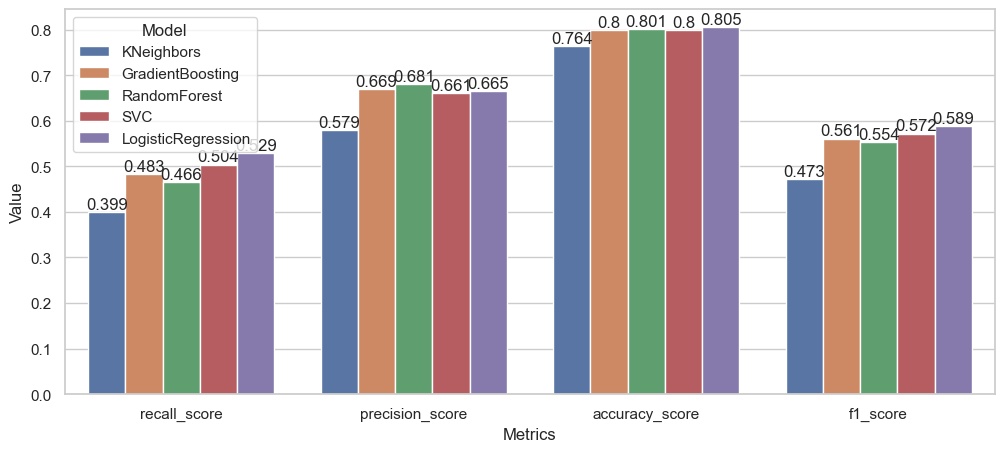

In [31]:
# Визуализация метрик качества
fig, ax = plt.subplots(figsize=(12, 5))
ax_bar = sns.barplot(data= df_score, x= 'Metrics', y = 'Value', hue='Model', ax =ax,)
for i in ax_bar.containers:
    ax.bar_label(i,)

* Лучший показатель метрики recall для модели логистической регрессии
* Лучший показатель метрики precision для модели случайного леса
* Лучший показатель accuracy для логистической регрессии
* Лучший показатель f1 для логистической регрессии

In [32]:
# Получение значений ROC-AUC score для моделей классификаторов

auc_list = []
models = [knn_model, gbc_model, rfc_model, svc_model, lr_model]
for model in models:
    proba = model.predict_proba(X_test)
    auc_list.append(round(roc_auc_score(y_test, proba[:, 1]),3))
df_auc = pd.DataFrame(list(zip(models_names, auc_list)), columns=['Model', 'AUC'])
df_auc

,Model,AUC
0,KNeighbors,0.778
1,GradientBoosting,0.852
2,RandomForest,0.845
3,SVC,0.837
4,LogisticRegression,0.845


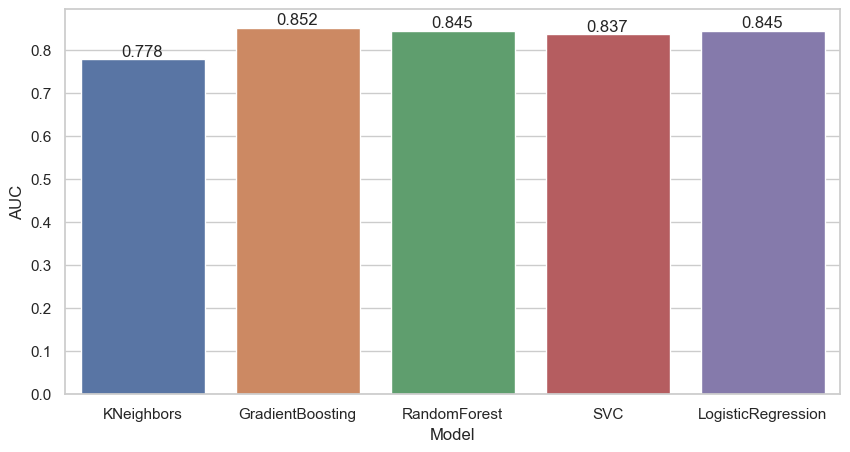

In [33]:
# Визуализация метрики 
fig, ax = plt.subplots(figsize=(10, 5))
ax_bar = sns.barplot(data= df_auc, x= 'Model', y = 'AUC',  ax =ax)
for i in ax_bar.containers:
    ax.bar_label(i,)

* Лучший показатель AUC для градиентного бустинга, на втором месте идут модели случайного леса и логистической регрессии

# Вывод по работе

В ходе проведения анализа данных и построения моделей было выяснено, что:
* Для клиентов, ушедших в отток, характерно отсутствие подписки на услуги онлайн безопасности, технической поддержки, резервного копирования, характерно использование бумажного биллинга, а также ежемесячный тип контракта.
* Ушедшие клиенты переплачивали за месячное пользование связью.
* Около 20% ушедших клиентов пользовалась услугами около месяца.
* В среднем по показателям recall_score, precision score, accuracy_score и F1_score лучшей является модель логистической регрессии
* Лучший показатель метрики AUC для модели градиентного бустинга, следом идут модели случайного леса и логистической регрессии с равными показателями.

# Дополнение

In [38]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)


In [39]:
params = {'objective': 'binary:logistic',
          'max_depth': 3,
          'eta': 0.1}

num_rounds = 60

In [40]:
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds)

In [51]:
predictions = xgb_model.predict(dtest)

In [49]:
thresholds = np.linspace(0.1, 0.9, 20)

Text(0, 0.5, 'f1 score')

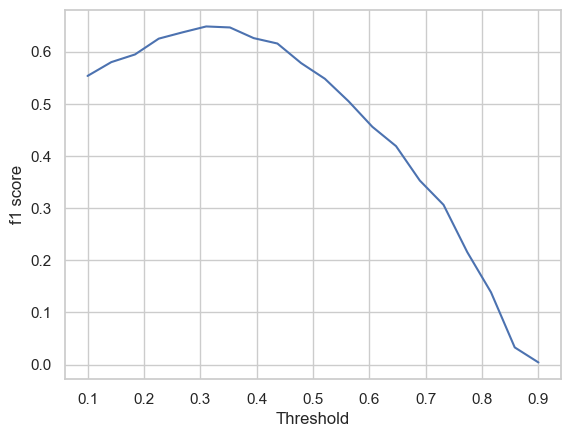

In [54]:
f1_scores = []

for i_t in thresholds:
    f1_scores.append(f1_score(y_test, predictions>i_t))
    
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('f1 score')